In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from sklearn import datasets
from sklearn.cluster import KMeans

In [8]:
df = pd.read_csv ('./data/game_tag.csv', encoding = 'utf-8', header = 0)
game_list = pd.read_csv ('./data/game_list_valid.csv', encoding = 'utf-8', header = 0)

In [9]:
df = df[df['game_id'].isin(game_list['game_id'])]

In [10]:
df

,game_id,tag
0,4000,Sandbox
1,4000,Multiplayer
2,4000,Funny
3,4000,Moddable
4,4000,Building
...,...,...
57576,252690,Tabletop
57577,252690,Game Development
57578,252690,Party-Based RPG
57579,252690,Multiplayer


In [11]:
df['tmp'] = 1

In [12]:
df

,game_id,tag,tmp
0,4000,Sandbox,1
1,4000,Multiplayer,1
2,4000,Funny,1
3,4000,Moddable,1
4,4000,Building,1
...,...,...,...
57576,252690,Tabletop,1
57577,252690,Game Development,1
57578,252690,Party-Based RPG,1
57579,252690,Multiplayer,1


In [13]:
df = df.pivot_table (index = 'game_id', columns = 'tag', values = 'tmp', aggfunc = np.mean)

In [14]:
df = df.fillna(0)

In [15]:
df

tag,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,3D,3D Fighter,3D Platformer,3D Vision,...,Warhammer 40K,Web Publishing,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,eSports
game_id,,,,,,,,,,,,,,,,,,,,,
10,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1148650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1149660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.feature_extraction.text import TfidfTransformer

In [17]:
transformer = TfidfTransformer() # tfidf 변환 인스턴스 생성
tfidf = transformer.fit_transform(df).toarray()
print(tfidf)

[[0.32989843 0.26778949 0.         ... 0.         0.         0.31363462]
 [0.         0.28403025 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [18]:
my_df = pd.DataFrame (tfidf*100, index = df.index, columns = df.columns)

In [19]:
my_df

tag,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,3D,3D Fighter,3D Platformer,3D Vision,...,Warhammer 40K,Web Publishing,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,eSports
game_id,,,,,,,,,,,,,,,,,,,,,
10,32.989843,26.778949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,31.363462
20,0.000000,28.403025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
30,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,39.798979,27.807737,0.0,0.0,0.000000
40,0.000000,34.524396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
50,0.000000,33.682427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147510,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
1148650,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
1149660,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000


1 :  30805244.305700574 



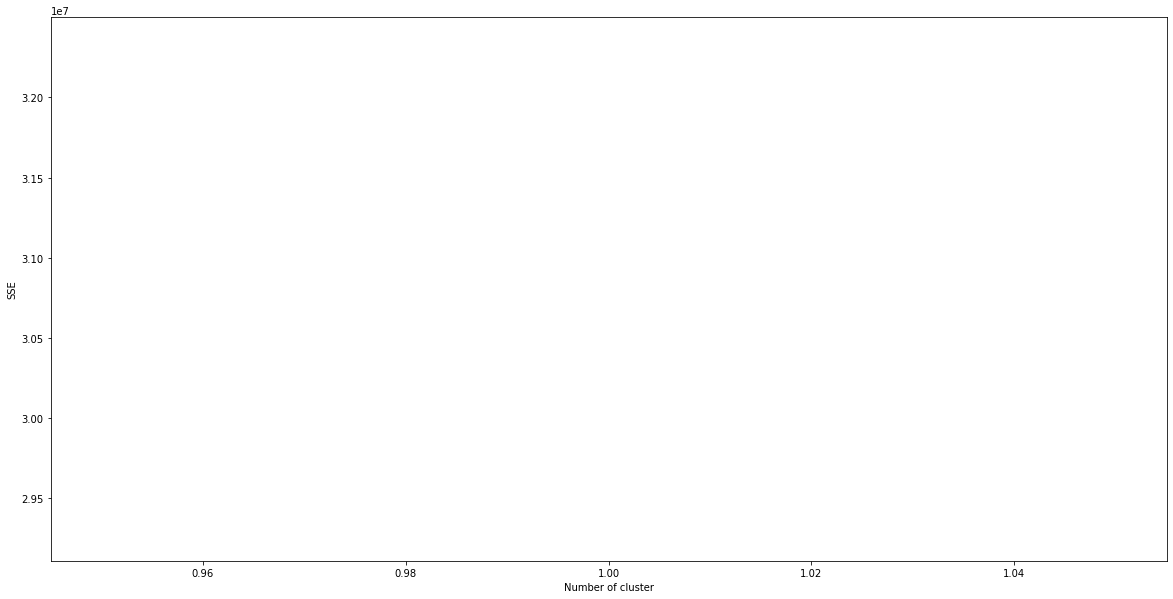

2 :  29707627.627094306 



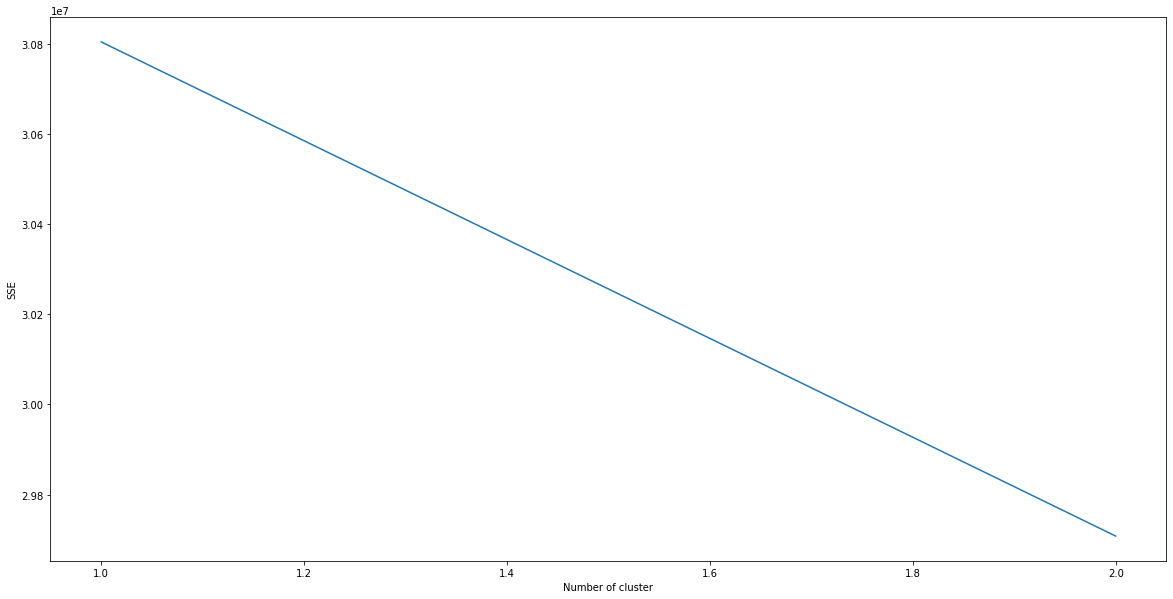

3 :  29060975.89375303 



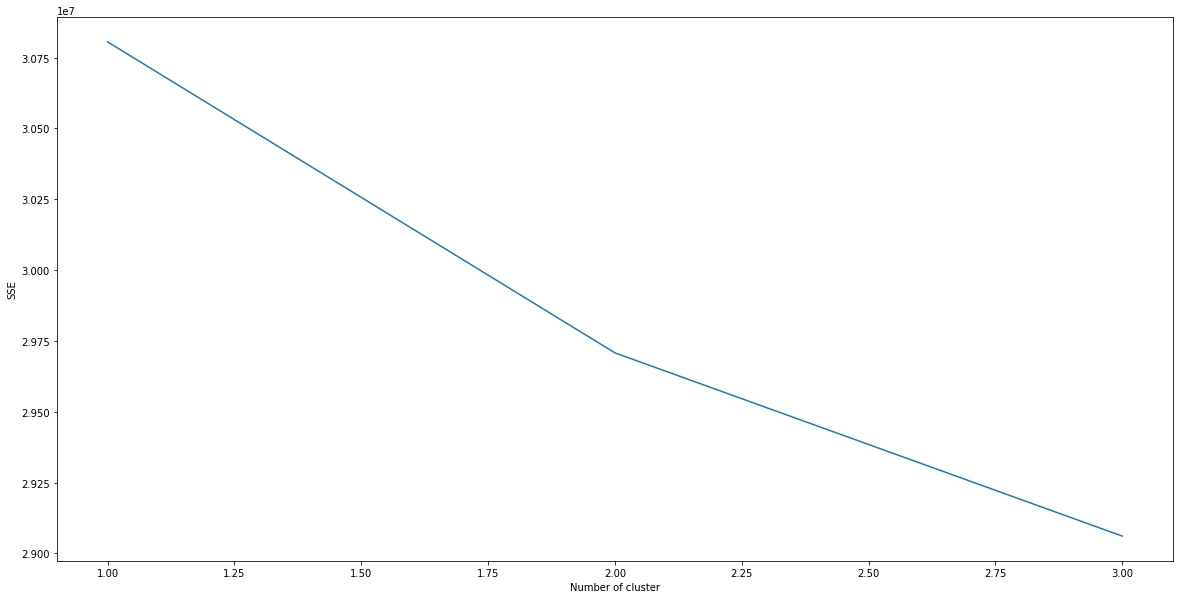

4 :  28572629.760187794 



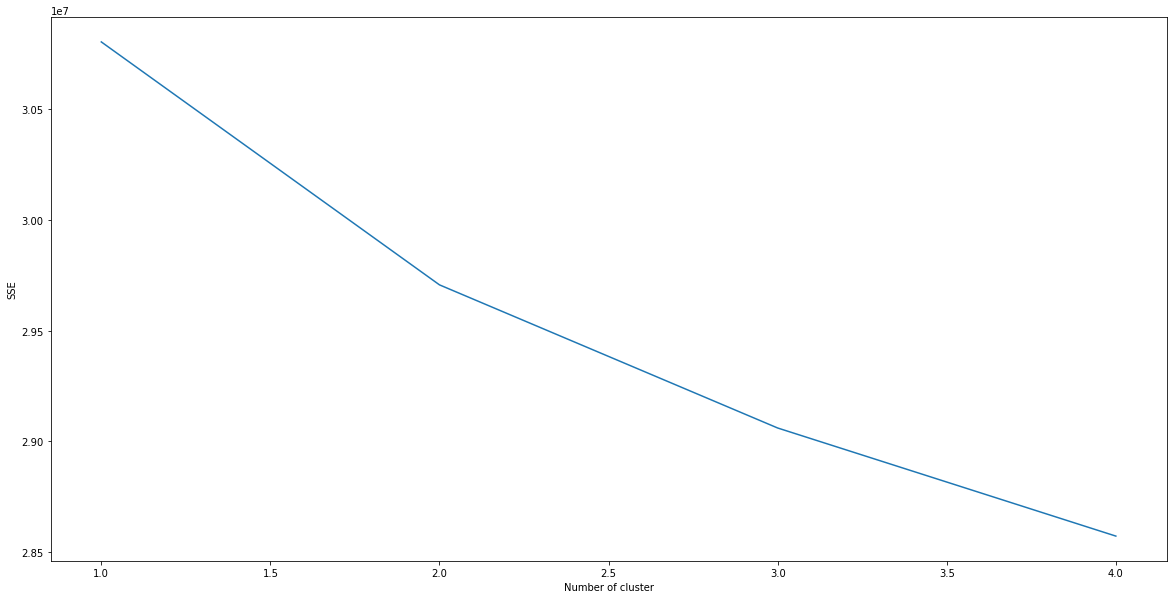

5 :  28134427.722443838 



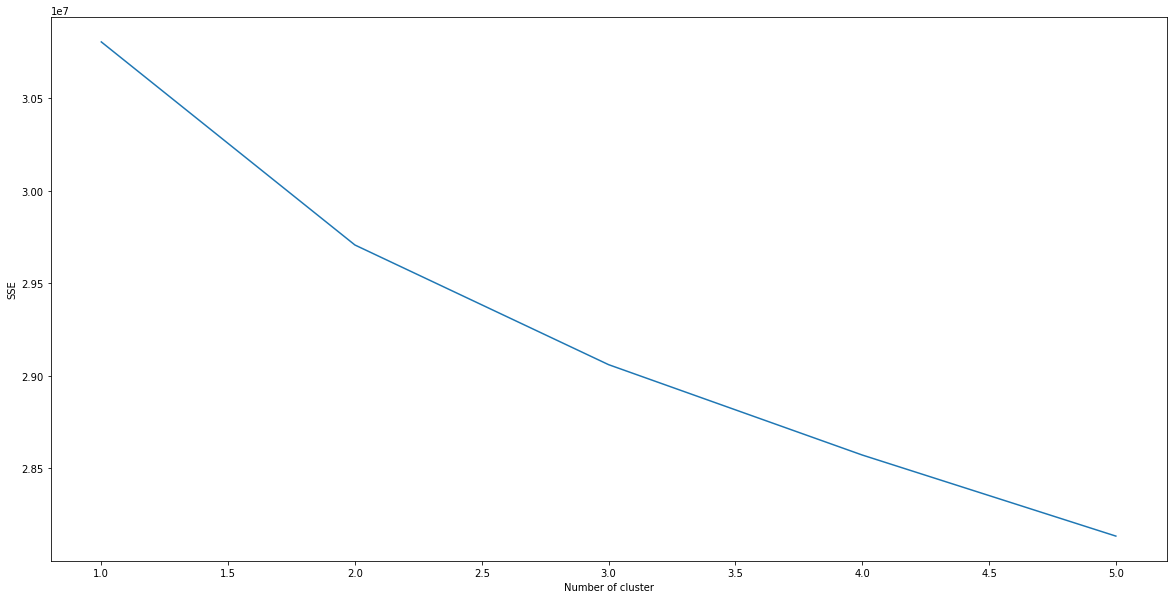

6 :  27702168.49100654 



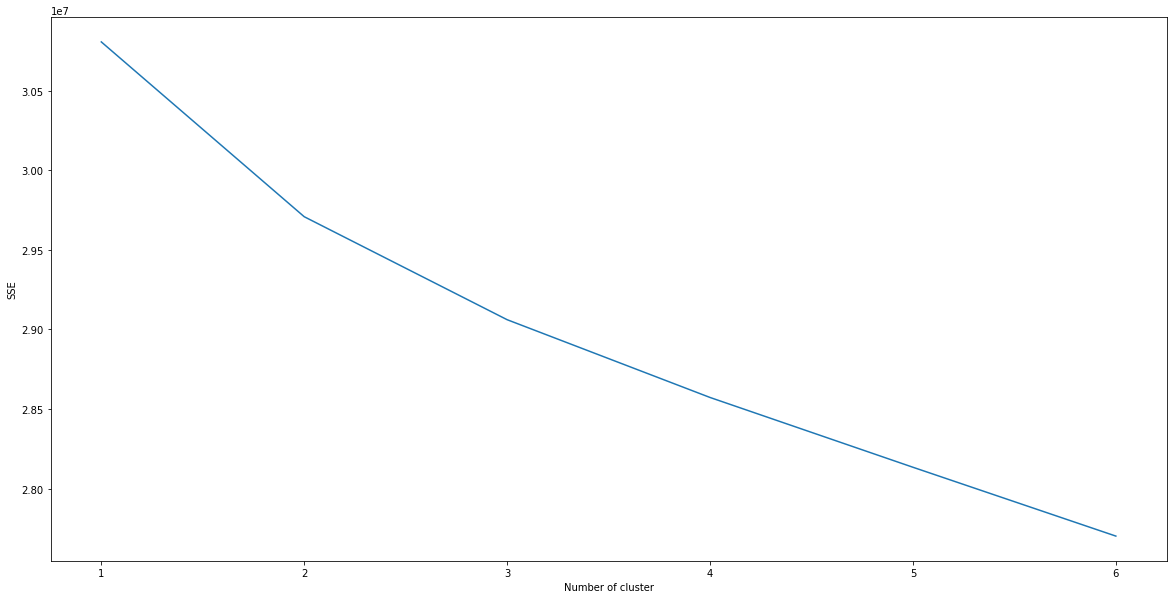

7 :  27320065.04221765 



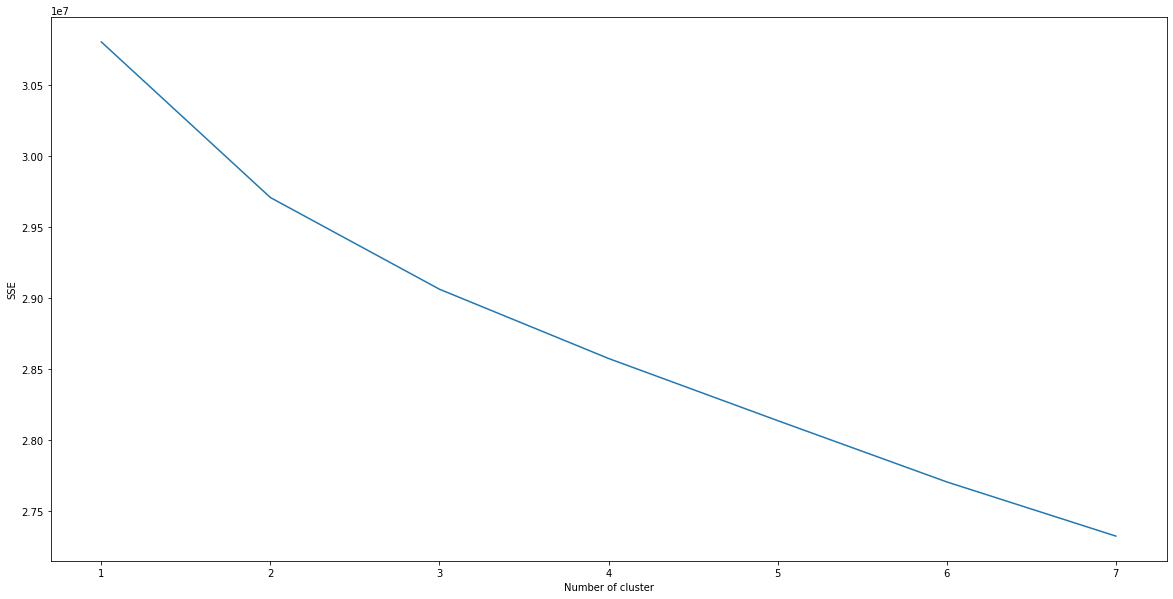

8 :  26982005.871900193 



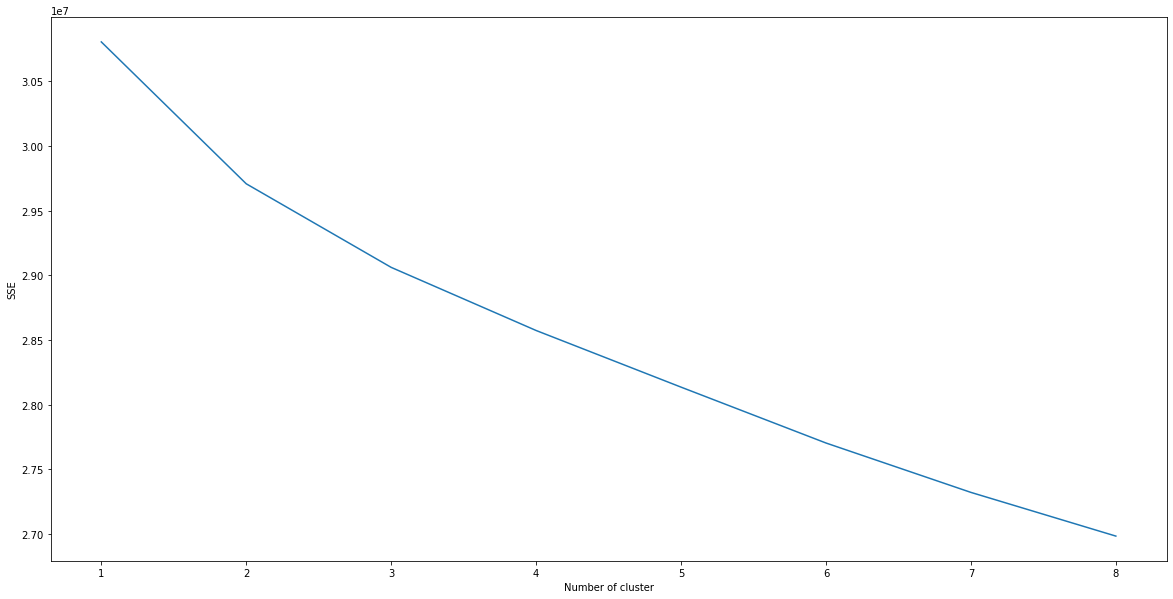

9 :  26699929.40725514 



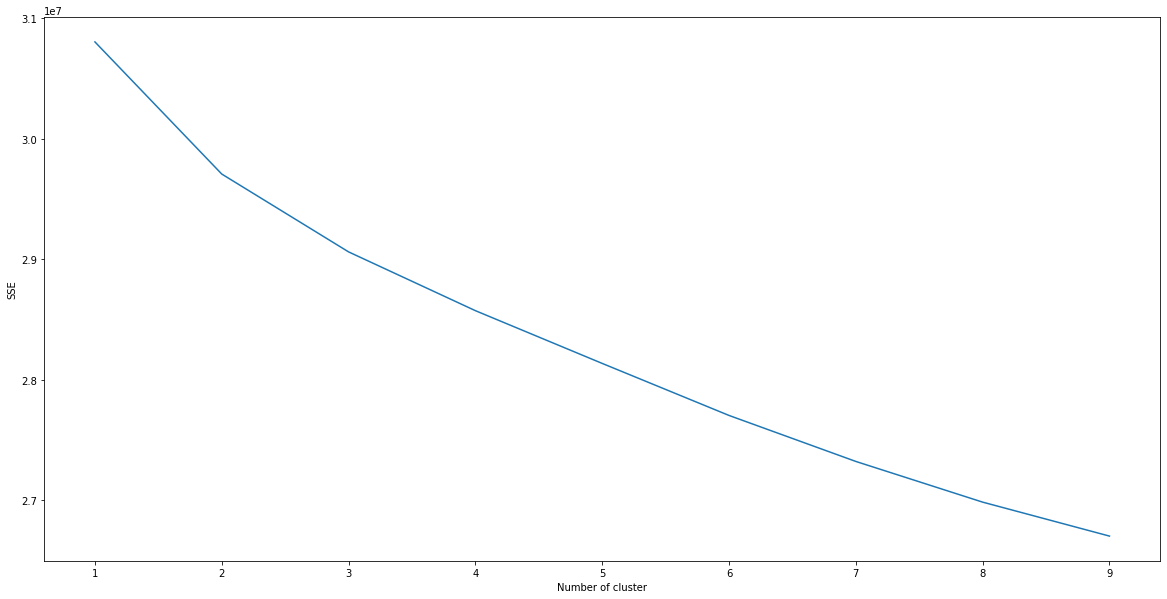

10 :  26447448.51706345 



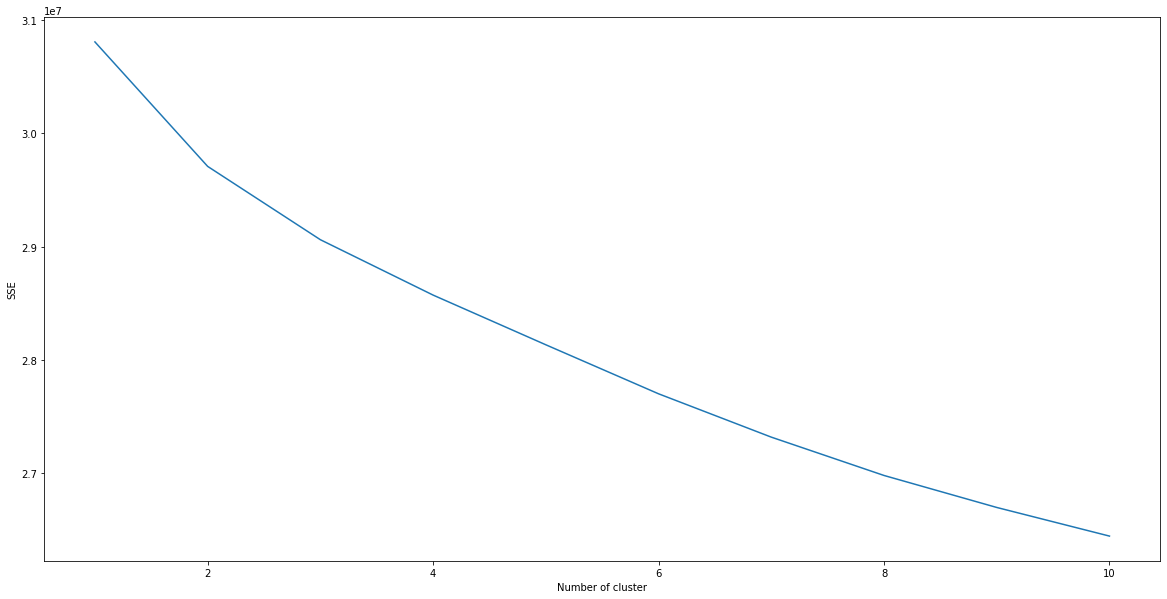

11 :  26196909.853833865 



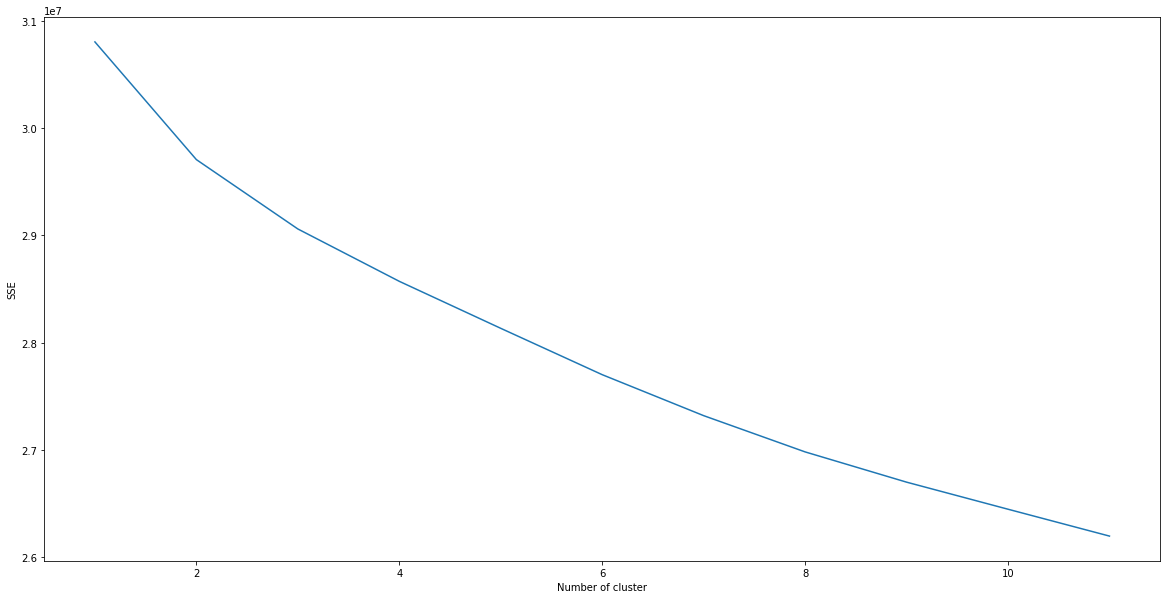

12 :  25946862.785584122 



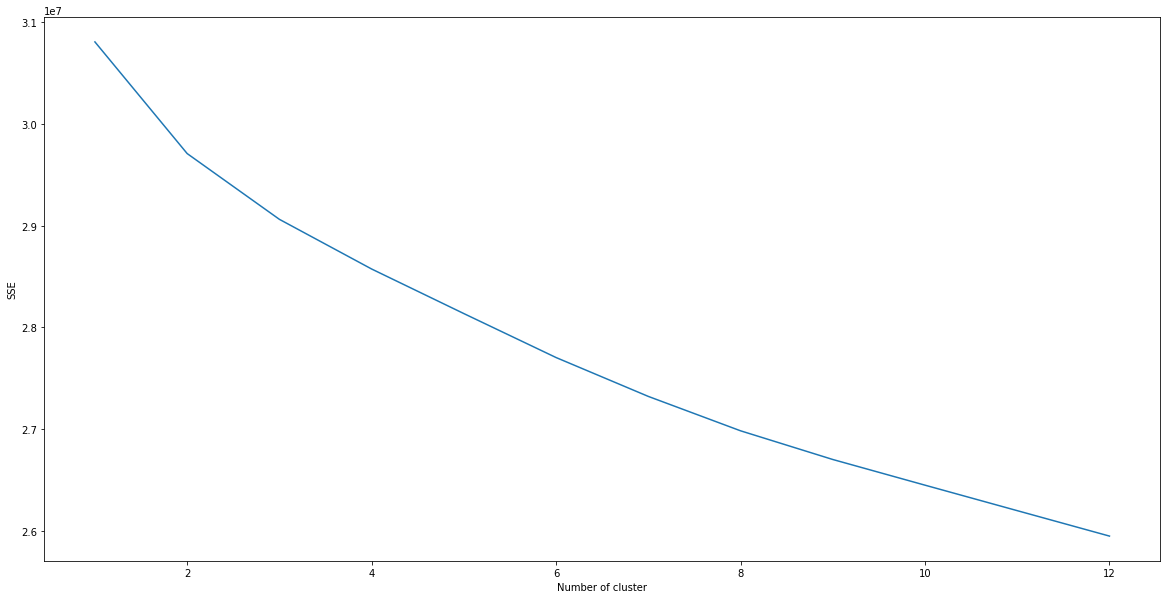

13 :  25727647.930460762 



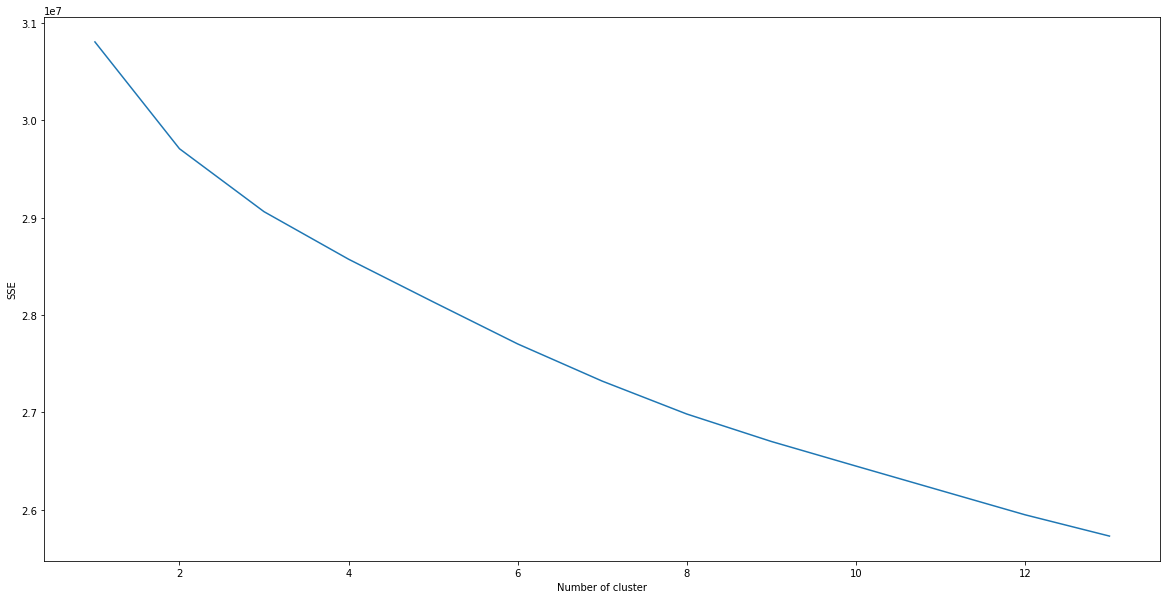

14 :  25505848.765148677 



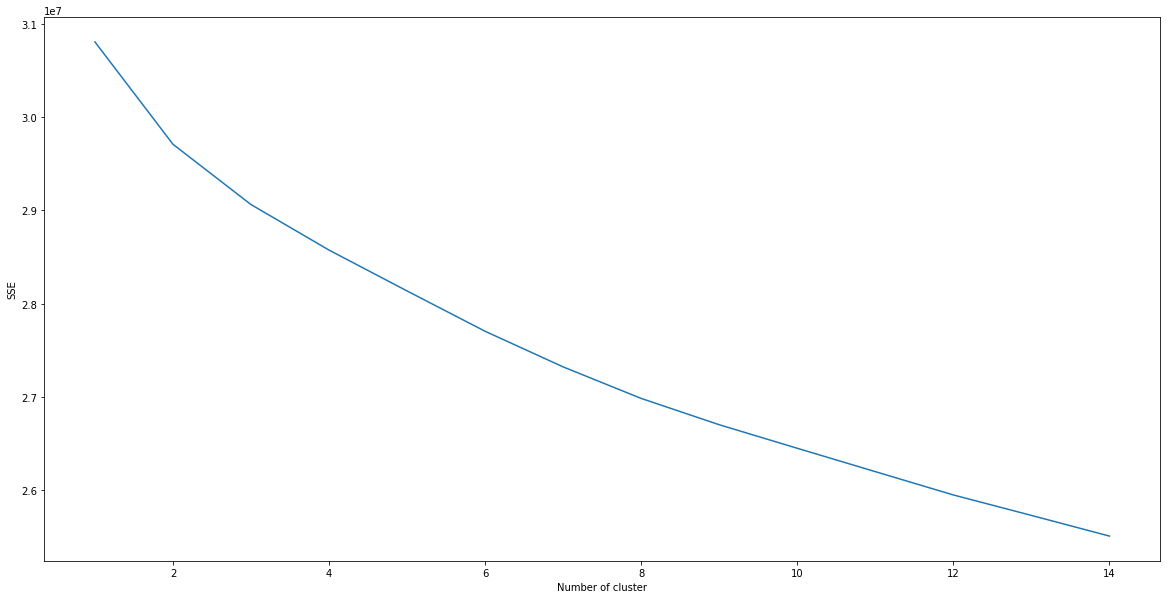

15 :  25450757.6999168 



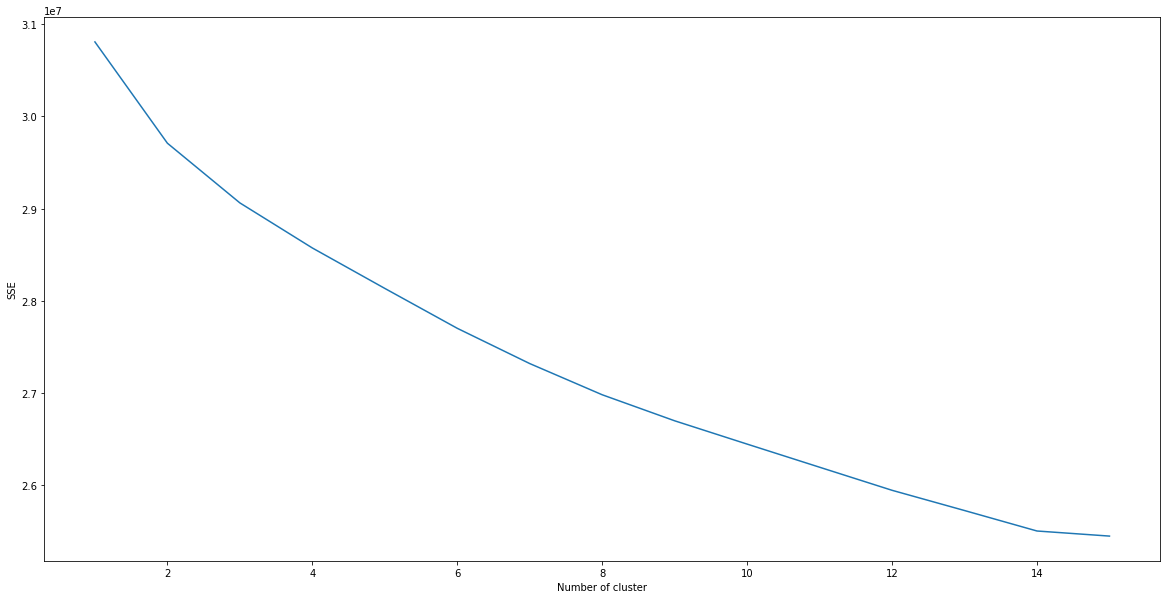

16 :  25208406.377186064 



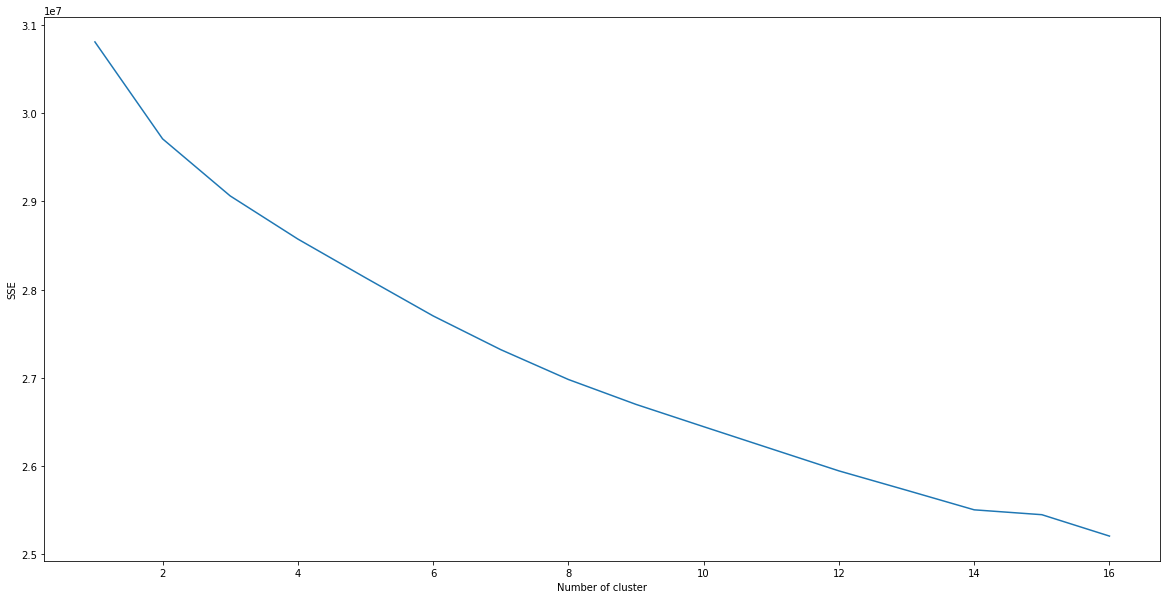

17 :  25006095.793539684 



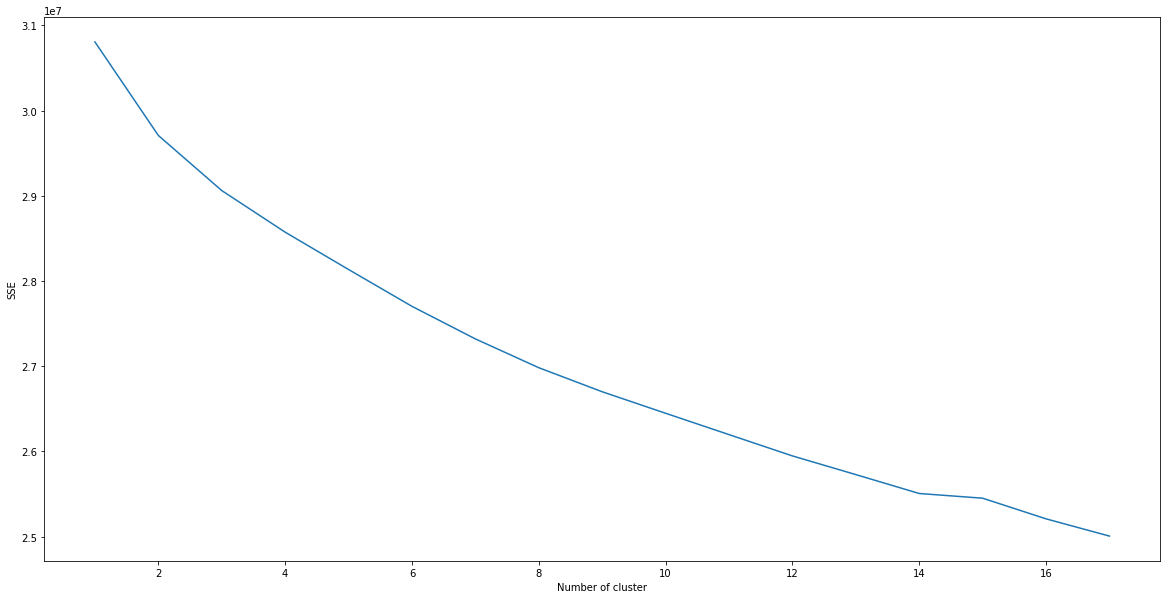

18 :  24888672.420899913 



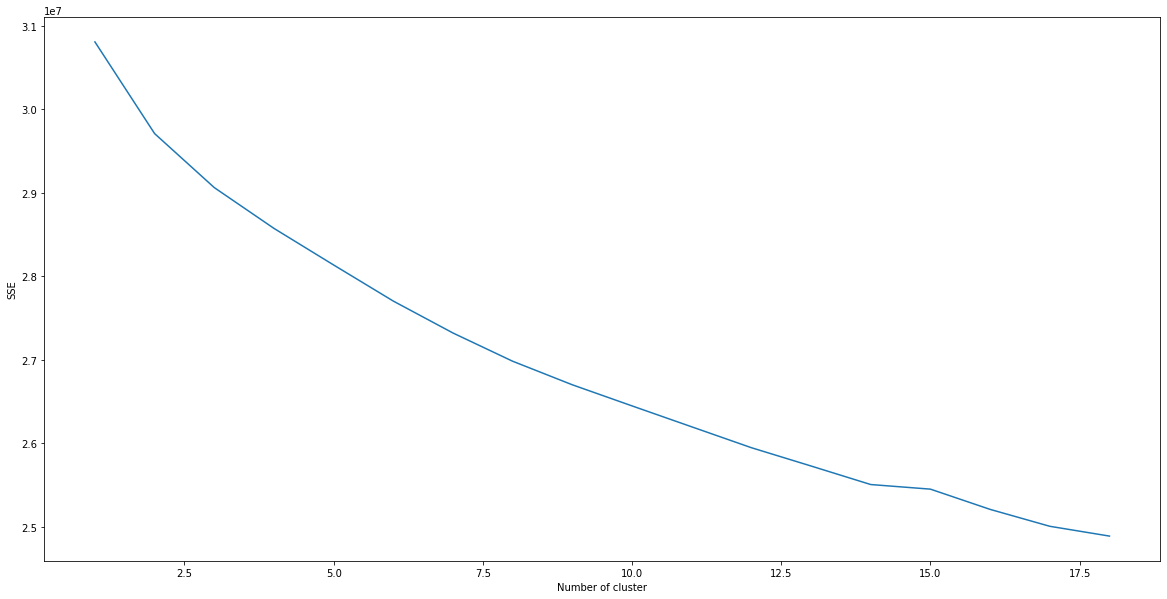

19 :  24715859.35063186 



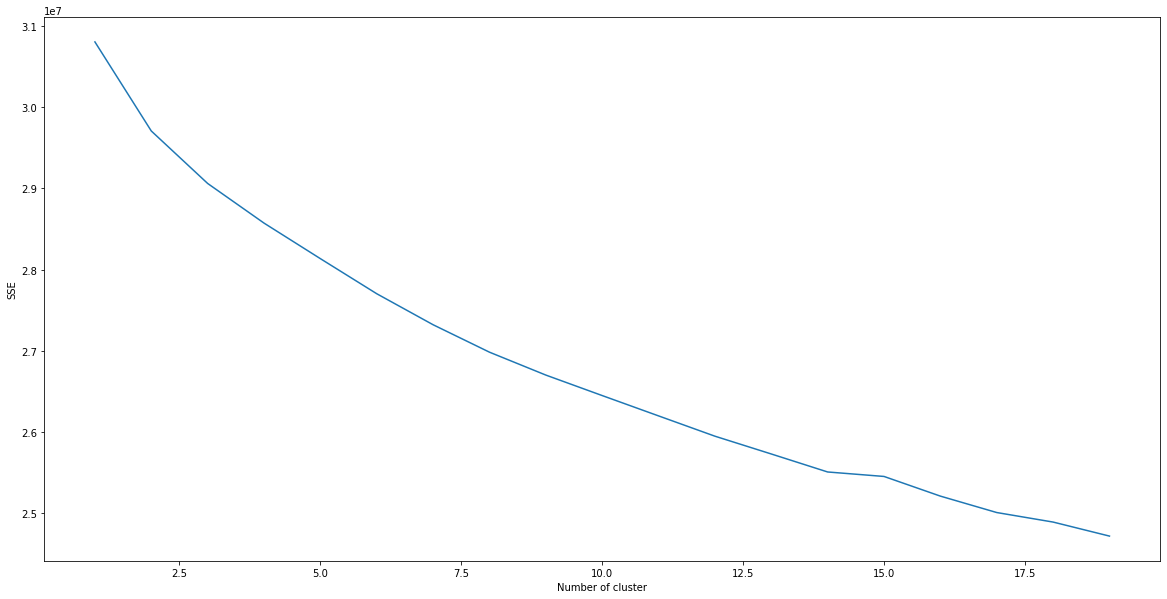

20 :  24634734.151878428 



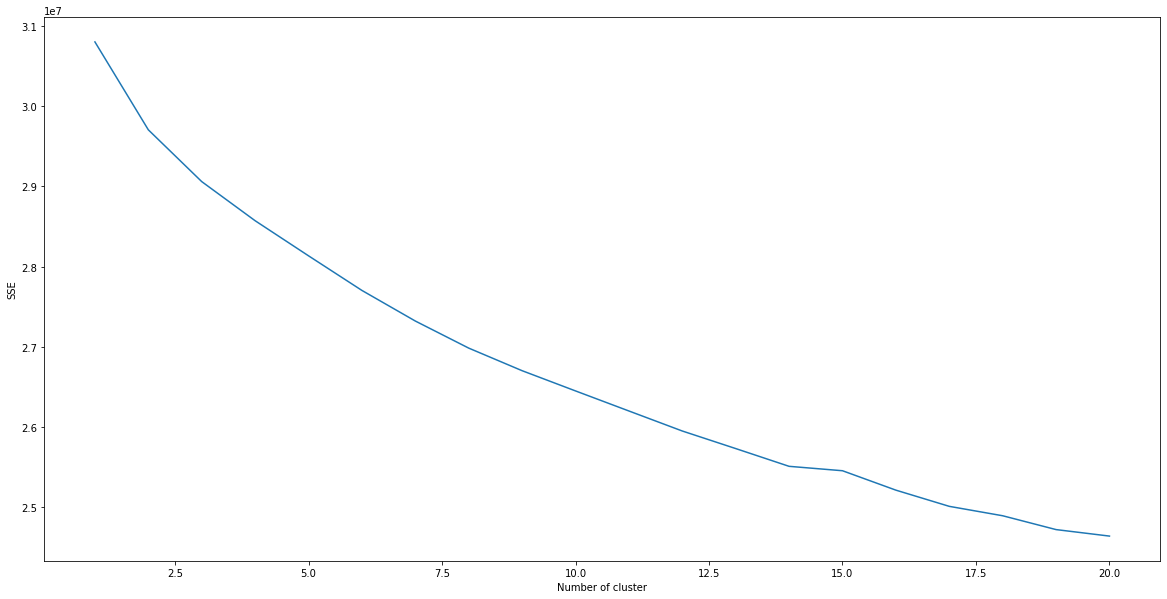

21 :  24483706.880291704 



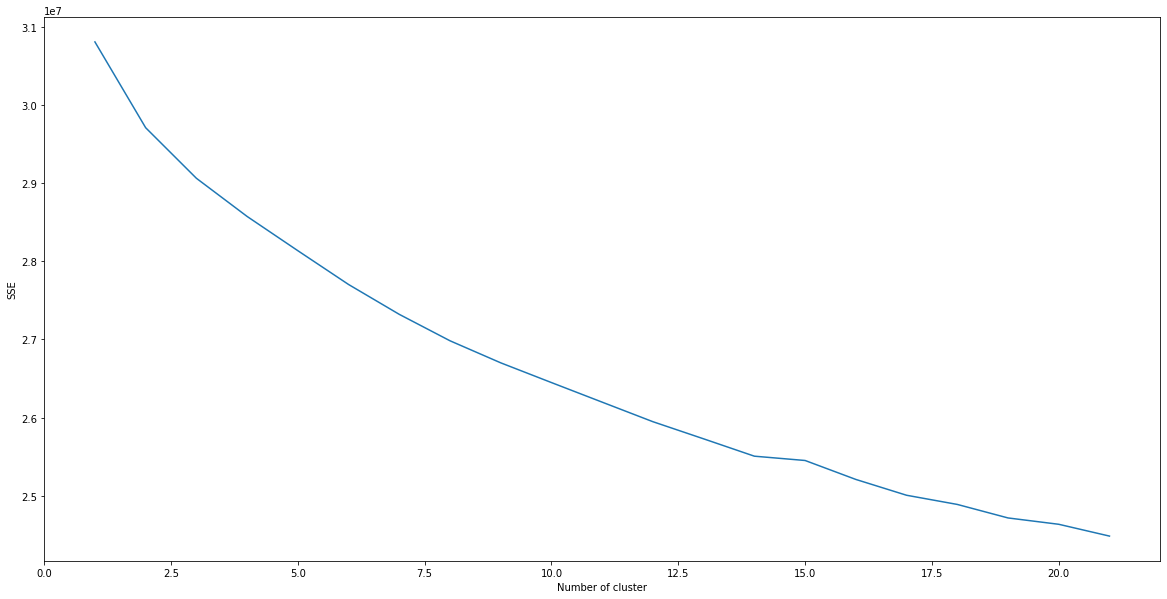

22 :  24338323.716740318 



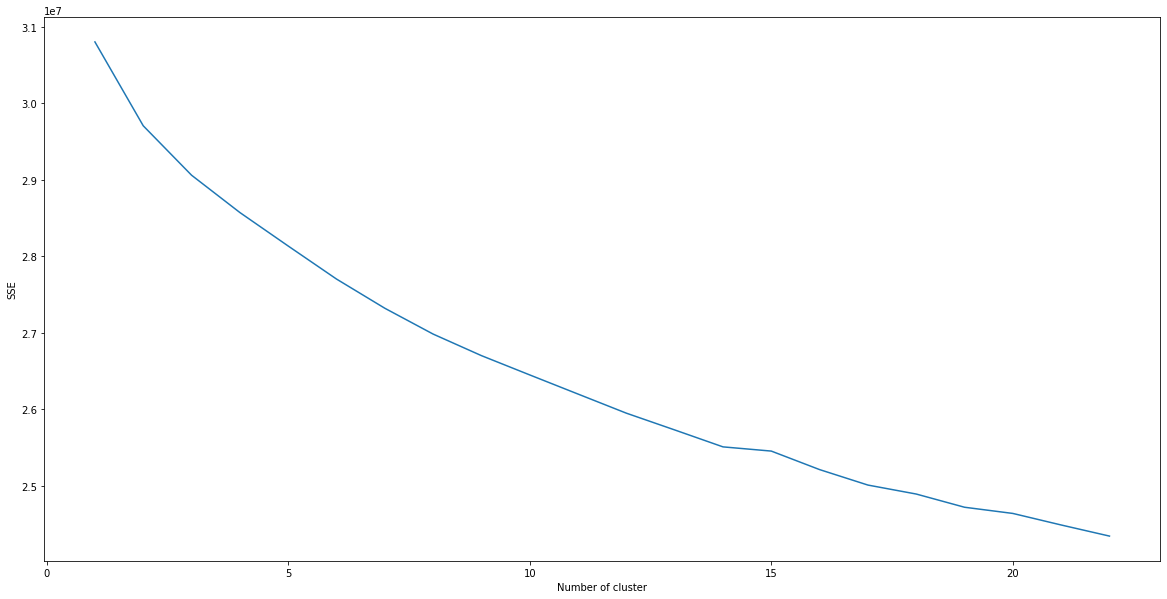

23 :  24200238.301416885 



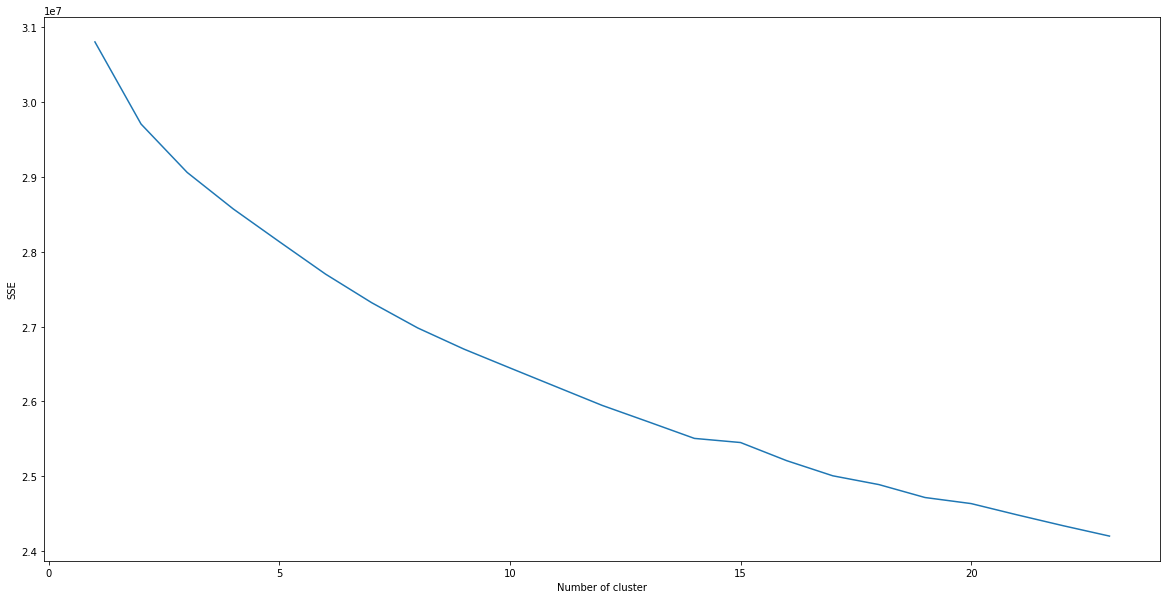

24 :  24045745.57592246 



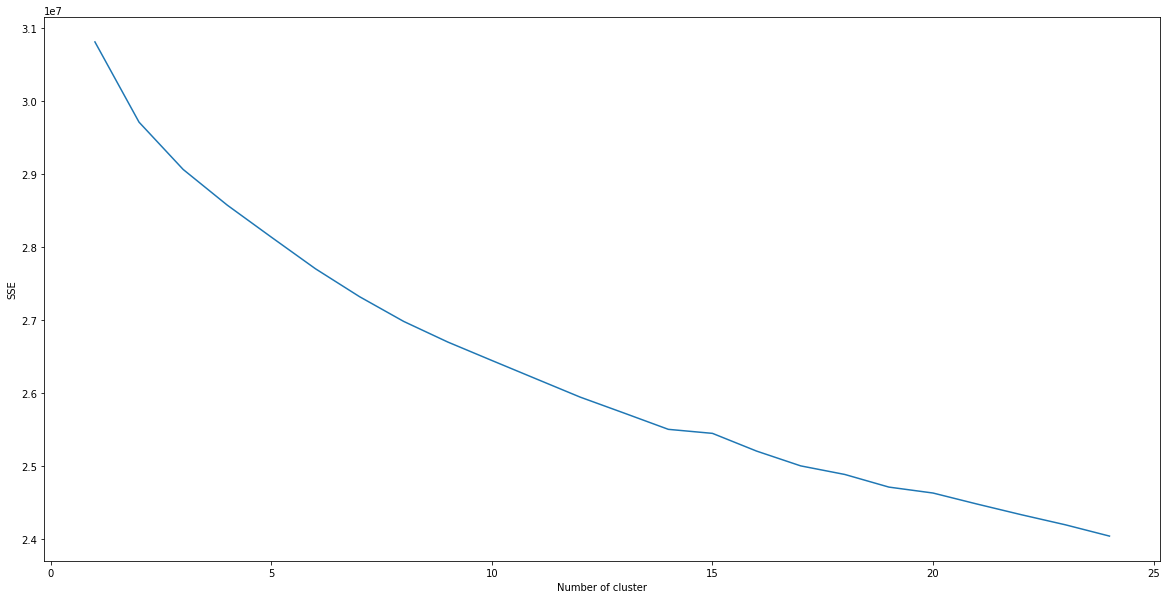

25 :  24025941.769778214 



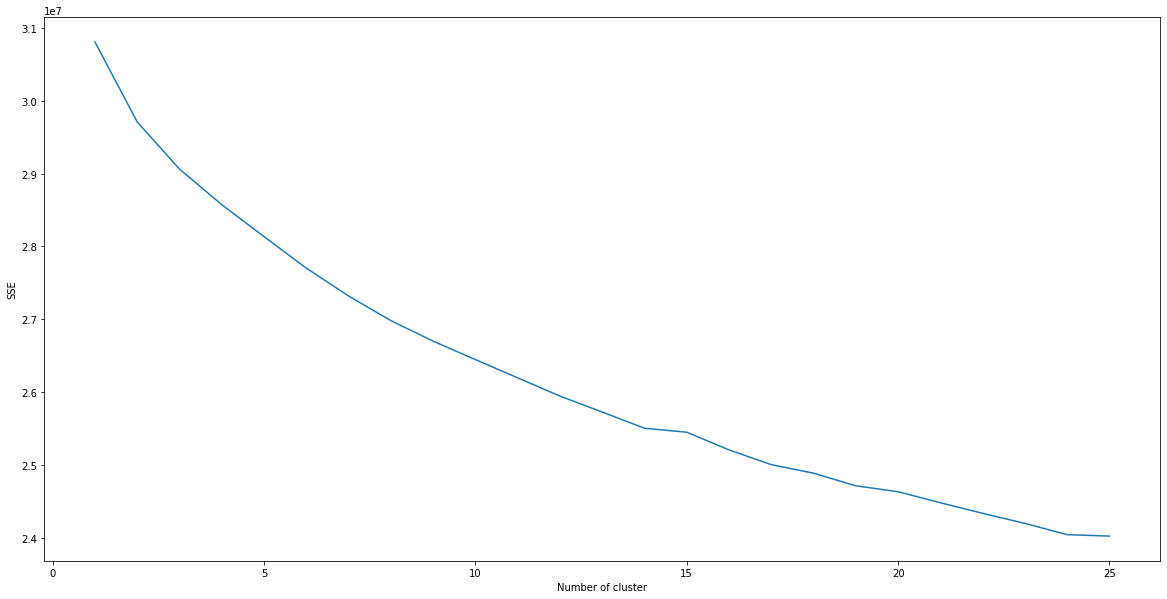

26 :  23895267.413718324 



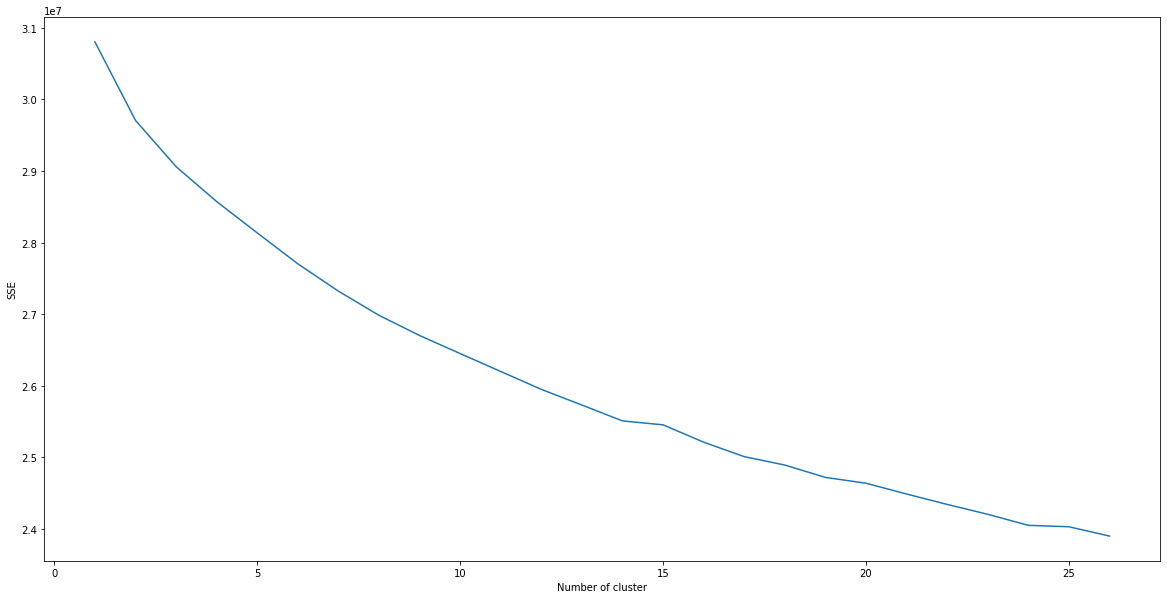

27 :  23763872.38201657 



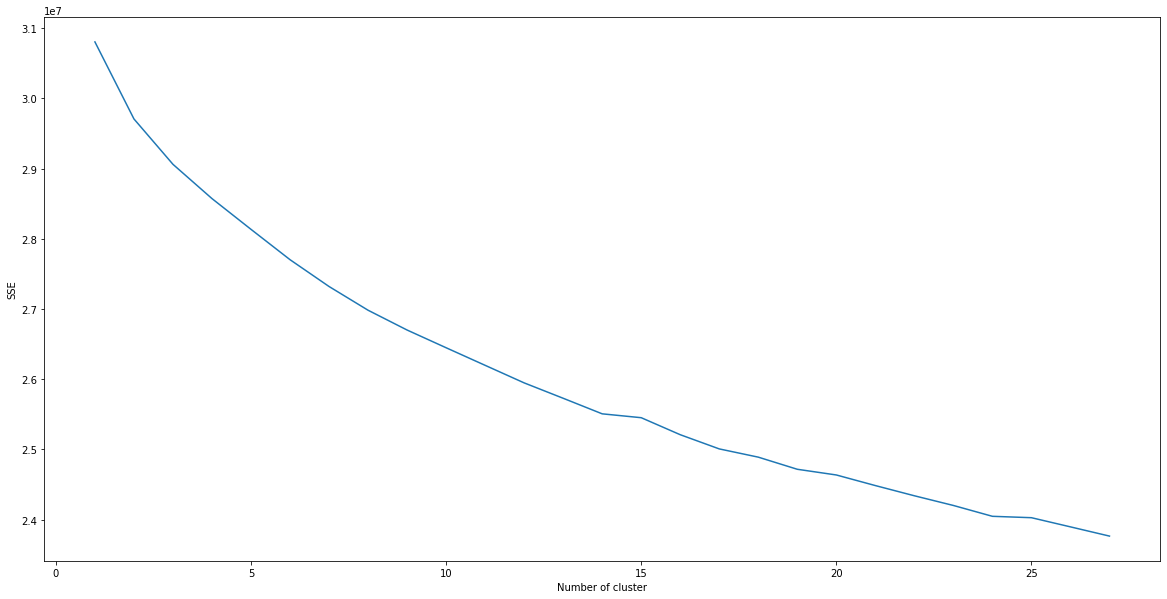

28 :  23683435.8956348 



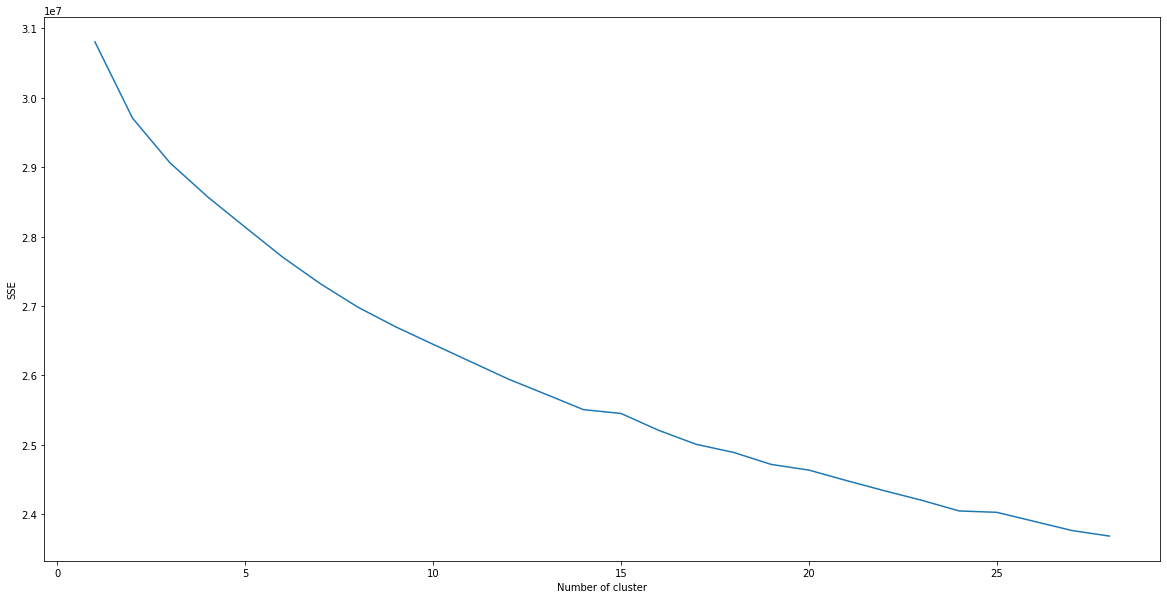

29 :  23567755.4206545 



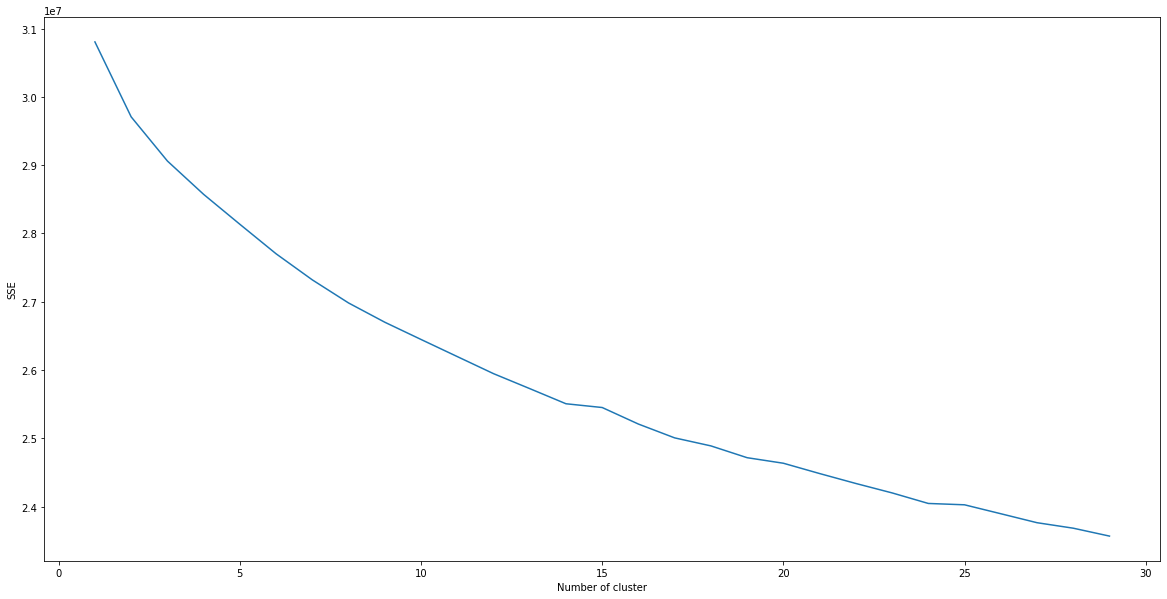

In [22]:
sse = {}
for k in range(1,30):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(my_df)
    my_df["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    print (k, ": ", sse[k], "\n")
    plt.rcParams['figure.figsize'] = [20.0, 10.0]
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.show()

In [23]:
sse

{1: 30805244.305700574,
 2: 29707627.627094306,
 3: 29060975.89375303,
 4: 28572629.760187794,
 5: 28134427.722443838,
 6: 27702168.49100654,
 7: 27320065.04221765,
 8: 26982005.871900193,
 9: 26699929.40725514,
 10: 26447448.51706345,
 11: 26196909.853833865,
 12: 25946862.785584122,
 13: 25727647.930460762,
 14: 25505848.765148677,
 15: 25450757.6999168,
 16: 25208406.377186064,
 17: 25006095.793539684,
 18: 24888672.420899913,
 19: 24715859.35063186,
 20: 24634734.151878428,
 21: 24483706.880291704,
 22: 24338323.716740318,
 23: 24200238.301416885,
 24: 24045745.57592246,
 25: 24025941.769778214,
 26: 23895267.413718324,
 27: 23763872.38201657,
 28: 23683435.8956348,
 29: 23567755.4206545}

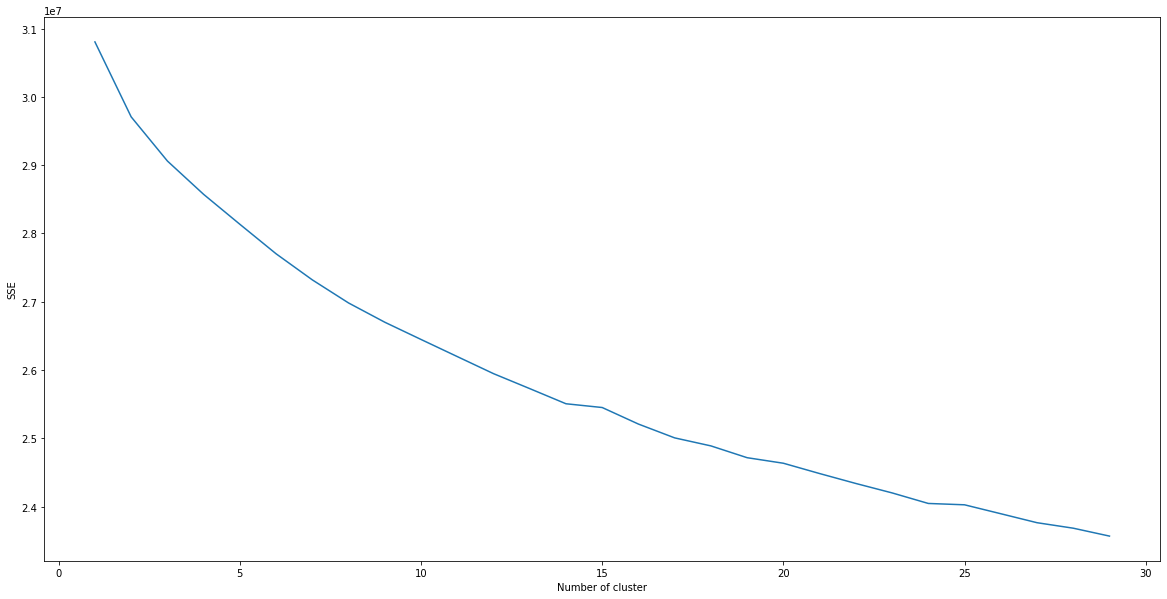

In [24]:
  plt.rcParams['figure.figsize'] = [20.0, 10.0]
  plt.figure()
  plt.plot(list(sse.keys()), list(sse.values()))
  plt.xlabel("Number of cluster")
  plt.ylabel("SSE")
  plt.show()

In [25]:
kmeans = KMeans(n_clusters=25, algorithm = 'auto')
kmeans.fit (my_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=25, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
predict = pd.DataFrame (kmeans.predict(my_df), columns = ['cluster'])
predict ['game_id'] = my_df.index
predict

,cluster,game_id
0,20,10
1,20,20
2,23,30
3,20,40
4,20,50
...,...,...
3393,12,1147510
3394,5,1148650
3395,12,1149660
3396,6,1162520


In [88]:
b = predict.groupby(by ='cluster', axis = 0).count().rename(columns = {'game_id' :'game_count'})

In [32]:
indie = predict.copy()
indie.index = indie['game_id']
indie = pd.concat ([indie, df], axis = 1 )
pd.set_option('display.max_columns', None)
indie = indie.groupby ('cluster').mean()

In [40]:
indie

,game_id,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,3D,3D Fighter,3D Platformer,3D Vision,4 Player Local,4X,6DOF,ATV,Abstract,Action,Action RPG,Action-Adventure,Addictive,Adventure,Agriculture,Aliens,Alternate History,America,Animation & Modeling,Anime,Arcade,Archery,Arena Shooter,Artificial Intelligence,Assassin,Asymmetric VR,Asynchronous Multiplayer,Atmospheric,Audio Production,Automation,Automobile Sim,BMX,Base Building,Baseball,Based On A Novel,Basketball,Batman,Battle Royale,Beat 'em up,Beautiful,Benchmark,Bikes,Blood,Board Game,Bowling,Boxing,Building,Bullet Hell,Bullet Time,CRPG,Capitalism,Card Game,Cartoon,Cartoony,Casual,Cats,Character Action Game,Character Customization,Chess,Choices Matter,Choose Your Own Adventure,Cinematic,City Builder,Class-Based,Classic,Clicker,Co-op,Co-op Campaign,Cold War,Collectathon,Colorful,Combat,Combat Racing,Comedy,Comic Book,Competitive,Conspiracy,Controller,Conversation,Crafting,Crime,Crowdfunded,Cult Classic,Cute,Cyberpunk,Cycling,Dark,Dark Comedy,Dark Fantasy,Dark Humor,Dating Sim,Demons,Design & Illustration,Destruction,Detective,Difficult,Dinosaurs,Diplomacy,Documentary,Dog,Dragons,Drama,Driving,Dungeon Crawler,Dungeons & Dragons,Dynamic Narration,Dystopian,Early Access,Economy,Education,Emotional,Epic,Episodic,Experience,Experimental,Exploration,FMV,FPS,Faith,Family Friendly,Fantasy,Fast-Paced,Female Protagonist,Fighting,First-Person,Fishing,Flight,Football,Foreign,Free to Play,Funny,Futuristic,Gambling,Game Development,GameMaker,Games Workshop,Gaming,God Game,Golf,Gore,Gothic,Grand Strategy,Great Soundtrack,Grid-Based Movement,Gun Customization,Hack and Slash,Hacking,Hand-drawn,Hardware,Heist,Hentai,Hex Grid,Hidden Object,Historical,Horror,Horses,Hunting,Illuminati,Immersive Sim,Indie,Intentionally Awkward Controls,Interactive Fiction,Inventory Management,Investigation,Isometric,JRPG,Jet,Kickstarter,LEGO,LGBTQ+,Lara Croft,Lemmings,Level Editor,Life Sim,Linear,Local Co-Op,Local Multiplayer,Logic,Loot,Lore-Rich,Lovecraftian,MMORPG,MOBA,Magic,Management,Mars,Martial Arts,Massively Multiplayer,Masterpiece,Match 3,Mature,Mechs,Medical Sim,Medieval,Memes,Metroidvania,Military,Mini Golf,Minigames,Minimalist,Mining,Mod,Moddable,Modern,Motocross,Motorbike,Mouse only,Movie,Multiplayer,Multiple Endings,Music,Music-Based Procedural Generation,Mystery,Mystery Dungeon,Mythology,NSFW,Narration,Nature,Naval,Naval Combat,Ninja,Noir,Nonlinear,Nudity,Offroad,Old School,On-Rails Shooter,Online Co-Op,Open World,Otome,Outbreak Sim,Parkour,Parody,Party-Based RPG,Perma Death,Philosophical,Physics,Pinball,Pirates,Pixel Graphics,Platformer,Point & Click,Political,Politics,Pool,Post-apocalyptic,Precision Platformer,Procedural Generation,Programming,Psychedelic,Psychological,Psychological Horror,Puzzle,Puzzle Platformer,PvE,PvP,Quick-Time Events,RPG,RPGMaker,RTS,Racing,Real Time Tactics,Real-Time,Real-Time with Pause,Realistic,Relaxing,Remake,Replay Value,Resource Management,Retro,Rhythm,Robots,Roguelike,Roguelite,Roguevania,Romance,Rome,Runner,Sailing,Sandbox,Satire,Sci-fi,Science,Score Attack,Sequel,Sexual Content,Shoot 'Em Up,Shooter,Short,Side Scroller,Silent Protagonist,Simulation,Singleplayer,Skateboarding,Skating,Skiing,Sniper,Snow,Snowboarding,Soccer,Social Deduction,Software,Software Training,Sokoban,Solitaire,Souls-like,Soundtrack,Space,Space Sim,Spectacle fighter,Split Screen,Sports,Star Wars,Stealth,Steam Machine,Steampunk,Story Rich,Strategy,Strategy RPG,Stylized,Submarine,Superhero,Supernatural,Surreal,Survival,Survival Horror,Swordplay,Tabletop,Tactical,Tactical RPG,Tanks,Team-Based,Tennis,Text-Based,Third Person,Third-Person Shooter,Thriller,Time Attack,Time Management,Time Manipulation,Time Travel,Top-Down,Top-Down Shooter,Touch-Friendly,Tower Defense,TrackIR,Trading,Trading Card Game,Trains,Transhumanism,Transportation,Trivia,Turn-Based,Turn-Based Combat,Turn-Based Strategy,Turn-Based Tactics,Tutorial,Twin Stick Shooter,Typing,Underground,Underwater,Unforgiving,Utilities,VR,Vampire,Vehi

In [82]:
result = pd.DataFrame()
for i in range(0, 25):
    a = indie.iloc[i].sort_values(ascending=False)
    a = a.drop('game_id')
    a = a.to_frame()
    a = a.reset_index()
    a.rename(columns = {'index':'tag', 0:'cluster '+str(i)}, inplace = True)
    result = pd.concat([result, a], axis = 1, sort = True)

In [84]:
pd.set_option('display.max_rows', None)
result

,tag,cluster 0,tag,1,tag,2,tag,3,tag,4,tag,5,tag,6,tag,7,tag,8,tag,9,tag,10,tag,11,tag,12,tag,13,tag,14,tag,15,tag,16,tag,17,tag,18,tag,19,tag,20,tag,21,tag,22,tag,23,tag,24
0,Action,0.992248,Simulation,0.985507,Action,0.994118,Horror,0.940299,Indie,0.762542,Indie,0.985075,Multiplayer,0.867647,Multiplayer,0.821918,Action,0.923913,RPG,0.969697,Open World,0.921569,Adventure,0.910995,Anime,0.893082,Action,0.921739,Action,0.967391,Adventure,0.952632,Turn-Based,0.979452,Indie,0.793814,Platformer,0.987097,Indie,0.968085,Action,1.000000,Strategy,0.987805,Naval,0.964286,Military,0.933962,Strategy,1.000000
1,Singleplayer,0.945736,Strategy,0.971014,FPS,0.964706,Atmospheric,0.840796,Singleplayer,0.635452,Roguelike,0.925373,Action,0.860294,Simulation,0.821918,Indie,0.869565,Singleplayer,0.939394,Adventure,0.888889,Action,0.905759,Nudity,0.742138,Massively Multiplayer,0.913043,Fighting,0.956522,Singleplayer,0.952632,Strategy,0.924658,Action,0.762887,Singleplayer,0.961290,Casual,0.936170,FPS,0.993056,Grand Strategy,0.804878,Singleplayer,0.750000,Action,0.915094,RTS,0.754902
2,Third Person,0.930233,Singleplayer,0.927536,First-Person,0.782353,Adventure,0.830846,Simulation,0.581940,Roguelite,0.865672,Local Co-Op,0.816176,Singleplayer,0.808219,Singleplayer,0.847826,JRPG,0.909091,Indie,0.875817,Singleplayer,0.905759,Visual Novel,0.716981,Multiplayer,0.886957,Multiplayer,0.728261,Story Rich,0.842105,Singleplayer,0.828767,Great Soundtrack,0.762887,2D,0.954839,Singleplayer,0.904255,First-Person,0.979167,Singleplayer,0.780488,Open World,0.714286,Multiplayer,0.905660,Action,0.725490
3,Adventure,0.914729,Management,0.884058,Shooter,0.782353,Singleplayer,0.796020,Casual,0.525084,Singleplayer,0.791045,Co-op,0.786765,Driving,0.719178,Shooter,0.739130,Anime,0.858586,Singleplayer,0.862745,RPG,0.890052,Sexual Content,0.716981,Open World,0.695652,Singleplayer,0.706522,Point & Click,0.826316,RPG,0.773973,Singleplayer,0.742268,Indie,0.916129,Relaxing,0.744681,Shooter,0.951389,Multiplayer,0.731707,Simulation,0.642857,War,0.896226,Singleplayer,0.676471
4,Third-Person Shooter,0.782946,Sandbox,0.731884,Multiplayer,0.776471,Indie,0.781095,Strategy,0.454849,Action,0.723881,Local Multiplayer,0.786765,Racing,0.712329,Arcade,0.728261,Adventure,0.787879,Sandbox,0.862745,Fantasy,0.748691,Indie,0.704403,Early Access,0.643478,Great Soundtrack,0.608696,Indie,0.700000,Turn-Based Strategy,0.732877,Music,0.546392,Action,0.903226,Puzzle,0.680851,Singleplayer,0.902778,Turn-Based Strategy,0.634146,Multiplayer,0.607143,Singleplayer,0.820755,Multiplayer,0.588235
5,Atmospheric,0.751938,Building,0.673913,Co-op,0.694118,Psychological Horror,0.696517,Action,0.441472,RPG,0.679104,Singleplayer,0.683824,Open World,0.616438,Shoot 'Em Up,0.652174,Great Soundtrack,0.707071,Survival,0.843137,Atmospheric,0.623037,Singleplayer,0.654088,Adventure,0.626087,Anime,0.554348,Atmospheric,0.673684,Tactical,0.568493,Platformer,0.525773,Adventure,0.800000,Great Soundtrack,0.627660,Sci-fi,0.750000,Simulation,0.585366,Strategy,0.607143,Strategy,0.792453,Sci-fi,0.460784
6,Shooter,0.720930,Indie,0.652174,Singleplayer,0.641176,Action,0.616915,Funny,0.384615,Adventure,0.641791,Indie,0.661765,Action,0.554795,Great Soundtrack,0.652174,Fantasy,0.646465,Crafting,0.758170,Action RPG,0.586387,Adventure,0.647799,Indie,0.591304,Local Multiplayer,0.521739,Great Soundtrack,0.673684,Indie,0.513699,Casual,0.515464,Side Scroller,0.709677,Atmospheric,0.574468,Atmospheric,0.659722,Turn-Based,0.585366,Action,0.607143,Tactical,0.698113,Indie,0.382353
7,Multiplayer,0.620155,City Builder,0.615942,Adventure,0.494118,First-Person,0.606965,Adventure,0.337793,2D,0.589552,Funny,0.632353,Realistic,0.506849,2D,0.576087,Action,0.626263,Action,0.745098,Story Rich,0.586387,Casual,0.591195,PvP,0.573913,Arcade,0.510870,Puzzle,0.673684,Fantasy,0.513699,Adventure,0.463918,Great Soundtrack,0.664516,Short,0.542553,Adventure,0.638889,Historical,0.548780,Historical,0.571429,Simulation,0.698113,Co-op,0.362745
8,Open World,0.612403,Economy,0.550725

In [87]:
result.to_csv('tag_cluster.csv', encoding='utf-8')

In [89]:
b

,game_count
cluster,
0,129
1,138
2,170
3,201
4,299
5,134
6,136
7,146
8,92
